### Searching for LSBs / UDGs in a region

I choose a region $1^o \times 1^o$, apply some cuts and find LSB / UDG candidates. 

I check how each one of the cuts reduces the number of candidates. In principle I can even make plots to show how the number of candidates change (and true/false positives? - this would be interesting but difficult) as we vary the threshold of the cuts.

 - Second Region:
 
The second region I select is:
\begin{equation}
9.5 \leq \mbox{RA} \leq 10.5\\
-29.5 \leq \mbox{DEC} \leq -28.5 
\end{equation}
 
 

In [34]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
import skymapper as skm
from code.plot_utils import plot_pretty
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

%matplotlib inline
%pylab inline 
plot_pretty() 

Populating the interactive namespace from numpy and matplotlib


Import the DES data for the above region now:

In [35]:
REG_2 = fits.open('Region_2.fits')
print REG_2[1].header.keys

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  104 / length of dimension 1                          
NAXIS2  =                57842 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   24 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '                                                            

###### Import the data now

In [36]:
# Import everything 
# ========================================================
# ========================================================
# spread_model_i and its error
spread_model_i = REG_2[1].data['spread_model_i']
speraderr_model_i = REG_2[1].data['spreaderr_model_i']

# RA and DEC 
RA = REG_2[1].data['ra']
DEC = REG_2[1].data['dec']

# Image A/ Image B
IMAGE_A = REG_2[1].data['a_image']
IMAGE_B = REG_2[1].data['b_image']

# Magnitudes 
MAG_AUTO_G = REG_2[1].data['mag_auto_g']
MAG_AUTO_R = REG_2[1].data['mag_auto_r']
MAG_AUTO_I = REG_2[1].data['mag_auto_i']

# Flux radii - convert from pixels to arcseconds
FLUX_RADIUS_G = 0.263*REG_2[1].data['flux_radius_g']
FLUX_RADIUS_R = 0.263*REG_2[1].data['flux_radius_r']
FLUX_RADIUS_I = 0.263*REG_2[1].data['flux_radius_i'] 

# ================================================================================
# ================================================================================
# SURFACE BRIGHTNESSES

##Effective model surface brightness (SB) above background [mag/sq. arcmin]. 
#SB at the isophote which includes half of the flux from the model, above background
MU_EFF_G = REG_2[1].data['mu_eff_model_g']
MU_EFF_R = REG_2[1].data['mu_eff_model_r']
MU_EFF_I = REG_2[1].data['mu_eff_model_i']

#Peak surface brightness above background [mag/asec^2]
MU_MAX_G = REG_2[1].data['mu_max_g']
MU_MAX_R = REG_2[1].data['mu_max_r']
MU_MAX_I = REG_2[1].data['mu_max_i']

#Peak surface brightness above background  - using Model[mag/asec^2]
MU_MAX_MODEL_G = REG_2[1].data['mu_max_model_g']
MU_MAX_MODEL_R = REG_2[1].data['mu_max_model_r']
MU_MAX_MODEL_I = REG_2[1].data['mu_max_model_i']

#Mean surface brightness using the whole area inside the isophote used for MU_EFF_MODEL
MU_MEAN_G = REG_2[1].data['mu_mean_model_g']
MU_MEAN_R = REG_2[1].data['mu_mean_model_r']
MU_MEAN_I = REG_2[1].data['mu_mean_model_i']


print(len(RA))

57842


First cut: star-galaxy separation.

For that, I perform the cut:

\begin{equation}
spread\_model\_i + (5/3)spreaderr\_model\_i > 0.007
\end{equation}

(to keep only galaxies)

In [37]:
# Define the cut first
star_gal_cut = ((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)

# Perform the cut now
# =====================================================================
# =====================================================================

# RA and DEC
RA = RA[star_gal_cut]
DEC = DEC[star_gal_cut]

# Image A/ Image B
IMAGE_A = IMAGE_A[star_gal_cut]
IMAGE_B = IMAGE_B[star_gal_cut]

#Magnitudes 
MAG_AUTO_G = MAG_AUTO_G[star_gal_cut]
MAG_AUTO_R = MAG_AUTO_R[star_gal_cut]
MAG_AUTO_I = MAG_AUTO_I[star_gal_cut]

#Flux radii 
FLUX_RADIUS_G = FLUX_RADIUS_G[star_gal_cut]
FLUX_RADIUS_R = FLUX_RADIUS_R[star_gal_cut]
FLUX_RADIUS_I = FLUX_RADIUS_I[star_gal_cut]

# ================================================================================
# ================================================================================
# SURFACE BRIGHTNESSES

##Effective model surface brightness (SB) above background [mag/sq. arcmin]. 
#SB at the isophote which includes half of the flux from the model, above background
MU_EFF_G = MU_EFF_G[star_gal_cut]
MU_EFF_R = MU_EFF_R[star_gal_cut]
MU_EFF_I = MU_EFF_I[star_gal_cut]

#Peak surface brightness above background [mag/asec^2]
MU_MAX_G = MU_MAX_G[star_gal_cut]
MU_MAX_R = MU_MAX_R[star_gal_cut]
MU_MAX_I = MU_MAX_I[star_gal_cut]

#Peak surface brightness above background  - using Model[mag/asec^2]
MU_MAX_MODEL_G = MU_MAX_MODEL_G[star_gal_cut]
MU_MAX_MODEL_R = MU_MAX_MODEL_R[star_gal_cut]
MU_MAX_MODEL_I = MU_MAX_MODEL_I[star_gal_cut]

#Mean surface brightness using the whole area inside the isophote used for MU_EFF_MODEL
MU_MEAN_G = MU_MEAN_G[star_gal_cut]
MU_MEAN_R = MU_MEAN_R[star_gal_cut]
MU_MEAN_I = MU_MEAN_I[star_gal_cut]


print(len(RA))

49008


#### First cut: Surface brightness

The first cut we are going to perform is a cut w/r to the surface brightness, of the form: 

\begin{equation} 
\bar{\mu}_{eff}(g) > \alpha \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}

where $\bar{\mu}_{eff}(g)$ the g-band surface brightness with their circularized effective radii (the SExtractor mu_eff_model_g).

In Greco et al. it is adopted the number $\alpha = 24.3$. 

Another possible cut is in the peak central surface brightness ($g$ magnitude), $\mu_0(g)$. UDGs have:

\begin{equation}
\mu_0(g) \gtrsim 24 \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}

Generally, a cut of the form:

\begin{equation}
\mu_0(g) > \beta \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}

(The SExtractor 'mu_max_g' parameter)

In Greco paper it is adopted $\beta = 23.5$ (equivalent to the above $\alpha = 24.3$ they claim).

Here we will first explore how the sample size reduces as a function of the cut threshold for the two above possible cuts.

Then we will adopt the Greco cut and proceed.


- First: Sample size as a function of $\bar{\mu}_{eff}(g)$. We use a range $\alpha \in [23,25]$

- Second: Sample size as a function of $\mu_0(g)$. We use again a range of $\beta \in [23,25]$


In [38]:
# Range in alpha
alpha = np.linspace(23.0, 25.0, 100)
al_size = len(alpha) #Its size - it can change

# ===============================================================
# Initialize- an array to get the sample size after the cut
sample_size_eff = np.zeros(al_size)
sample_size_max = np.zeros(al_size)

for i in range(al_size):
    # Define the cut
    mu_eff_cut = (MU_EFF_G > alpha[i])
    RA_temp_cut = RA[mu_eff_cut]
    
    mu_max_cut = (MU_MAX_G > alpha[i])
    
    RA_temp_2_cut = RA[mu_max_cut]
    
    
    sample_size_eff[i] = len(RA_temp_cut)
    sample_size_max[i] = len(RA_temp_2_cut)
    

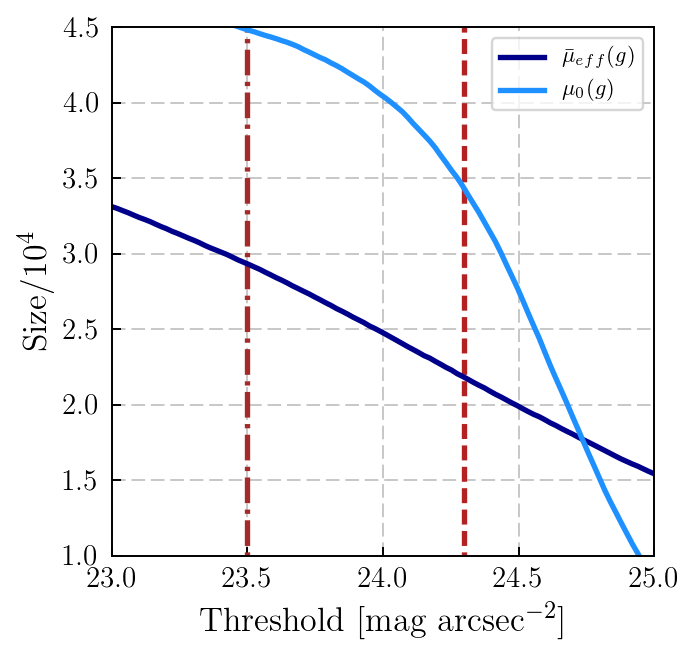

In [39]:
fig = plt.figure(figsize=(4.0,4.0))


plt.plot(alpha, sample_size_eff/1.0e4, color ='darkblue', linewidth = 2.2, label=r'$\bar{\mu}_{eff}(g)$' )
plt.plot(alpha, sample_size_max/1.0e4, color ='dodgerblue', linewidth = 2.2, label=r'$\mu_0(g)$' )
plt.grid(ls='--', alpha=0.7)

plt.vlines(24.3,0.5,5, color='firebrick', linestyle='--', linewidth= 2.2)
plt.vlines(23.5,0.5,5, color='brown', linestyle='-.', linewidth= 2.2)


plt.tick_params(axis='both', labelsize=12)
plt.xlim(23.0,25.0);plt.ylim(1,4.5)

plt.ylabel('Size$/10^4$',fontsize=14)
plt.xlabel('Threshold [mag arcsec$^{-2}$]',fontsize=14)

plt.legend(frameon=True, loc='upper right', fontsize=9)
plt.show()

Actually, lets repeat the above plot for all types of magnitudes

In [40]:
# ============================================================
# Initialize- an array to get the sample size after the cut
sample_size_eff = np.zeros(al_size)
sample_size_max = np.zeros(al_size)
sample_size_max_model = np.zeros(al_size)
sample_size_mean = np.zeros(al_size)
# ============================================================
# ============================================================
for i in range(al_size):
    # Define the cuts
    mu_eff_cut = (MU_EFF_G > alpha[i])
    mu_max_cut = (MU_MAX_G > alpha[i])
    mu_max_model_cut = (MU_MAX_MODEL_G > alpha[i])
    mu_mean_model_cut = (MU_MEAN_G > alpha[i])
     
    RA_eff_cut = RA[mu_eff_cut]
    RA_max_cut = RA[mu_max_cut]
    RA_max_model_cut = RA[mu_max_model_cut]
    RA_mean_model_cut = RA[mu_mean_model_cut]
    
    sample_size_eff[i] = len(RA_eff_cut)
    sample_size_max[i] = len(RA_max_cut)
    sample_size_max_model[i] = len(RA_max_model_cut)
    sample_size_mean[i] = len(RA_mean_model_cut)
    

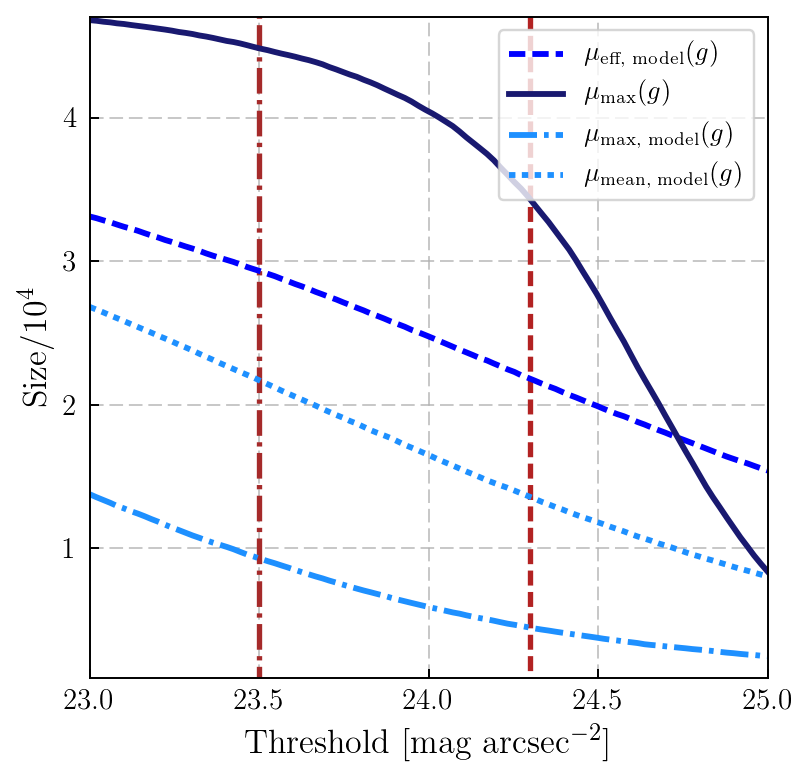

In [41]:
fig = plt.figure(figsize=(5.0,5.0))

plt.plot(alpha, sample_size_eff/1e4, c='blue', ls ='--', linewidth=2.4, label=r'$\mu_{\mbox{\scriptsize{eff, model}}}(g)$')
plt.plot(alpha, sample_size_max/1e4, c='midnightblue',linewidth=2.4, label=r'$\mu_{\mbox{\scriptsize{max}}}(g)$')
plt.plot(alpha, sample_size_max_model/1e4, c='dodgerblue',ls ='-.', linewidth=2.4, label=r'$\mu_{\mbox{\scriptsize{max, model}}}(g)$')
plt.plot(alpha, sample_size_mean/1e4,c='dodgerblue',ls =':', linewidth=2.4, label=r'$\mu_{\mbox{\scriptsize{mean, model}}}(g)$')
plt.grid(ls='--', alpha=0.7)

# =============================================================
# =============================================================
plt.vlines(24.3,0.0,5, color='firebrick', linestyle='--', linewidth= 2.2)
plt.vlines(23.5,0.0,5, color='brown', linestyle='-.', linewidth= 2.2)

# =============================================================
# =============================================================
plt.ylabel('Size$/10^4$',fontsize=14)
plt.xlabel('Threshold [mag arcsec$^{-2}$]',fontsize=14)
# =============================================================
# =============================================================

plt.legend(frameon=True, loc='upper right', fontsize=11)
plt.tick_params(axis='both', labelsize=12)
plt.xlim(23.0,25.0);plt.ylim(0.1,4.7)
plt.show()

We see that the $\mu_{max}(g)$ presents a qualitatively different behavior compared to the other three quantities (that use the effective model).

Here I will adopt and perform the cut:

\begin{equation} 
\bar{\mu}_{eff}(g) > 24.3 \,\, \mbox{mag}\,\mbox{arcsec}^{-2}
\end{equation}



In [42]:
# Define the cut first
# =============================================
mu_eff_cut = (MU_EFF_G > 24.3)
# =============================================
# =============================================

# Perform the cut now
# =====================================================================
# =====================================================================

# RA and DEC
RA_1 = RA[mu_eff_cut]
DEC_1 = DEC[mu_eff_cut]

# Image A/ Image B
IMAGE_A_1 = IMAGE_A[mu_eff_cut]
IMAGE_B_1 = IMAGE_B[mu_eff_cut]

#Magnitudes 
MAG_AUTO_G_1 = MAG_AUTO_G[mu_eff_cut]
MAG_AUTO_R_1 = MAG_AUTO_R[mu_eff_cut]
MAG_AUTO_I_1 = MAG_AUTO_I[mu_eff_cut]

#Flux radii 
FLUX_RADIUS_G_1 = FLUX_RADIUS_G[mu_eff_cut]
FLUX_RADIUS_R_1 = FLUX_RADIUS_R[mu_eff_cut]
FLUX_RADIUS_I_1 = FLUX_RADIUS_I[mu_eff_cut]

# ================================================================================
# ================================================================================
# SURFACE BRIGHTNESSES

##Effective model surface brightness (SB) above background [mag/sq. arcmin]. 
#SB at the isophote which includes half of the flux from the model, above background
MU_EFF_G_1 = MU_EFF_G[mu_eff_cut]
MU_EFF_R_1 = MU_EFF_R[mu_eff_cut]
MU_EFF_I_1 = MU_EFF_I[mu_eff_cut]

#Peak surface brightness above background [mag/asec^2]
MU_MAX_G_1 = MU_MAX_G[mu_eff_cut]
MU_MAX_R_1 = MU_MAX_R[mu_eff_cut]
MU_MAX_I_1 = MU_MAX_I[mu_eff_cut]

#Peak surface brightness above background  - using Model[mag/asec^2]
MU_MAX_MODEL_G_1 = MU_MAX_MODEL_G[mu_eff_cut]
MU_MAX_MODEL_R_1 = MU_MAX_MODEL_R[mu_eff_cut]
MU_MAX_MODEL_I_1 = MU_MAX_MODEL_I[mu_eff_cut]

#Mean surface brightness using the whole area inside the isophote used for MU_EFF_MODEL
MU_MEAN_G_1 = MU_MEAN_G[mu_eff_cut]
MU_MEAN_R_1 = MU_MEAN_R[mu_eff_cut]
MU_MEAN_I_1 = MU_MEAN_I[mu_eff_cut]


print(len(RA_1))

21809


The above cut reduces the sample from 49008 to 21809 objects, a reduction of $\sim 54 \%$.

#### Second cut: Color cuts

In Greco et. al. the following color cuts are used:

\begin{equation}
- 0.1 < (g-i) < 1.4 \\
(g - r )>0.7\cdot(g-i) - 0.4 \\
(g - r) < 0.7 \cdot (g-i) + 0.4
\end{equation}

I will adopt them to see how they affect the final results/ reduce the number of false positives, although I have to play an define my own color cuts at some point.

In [43]:
#  Define the color cuts 
col_1 = ((MAG_AUTO_G_1 - MAG_AUTO_I_1)>(-0.1))
col_2 = ((MAG_AUTO_G_1 - MAG_AUTO_I_1)<(1.4))
col_3 = ((MAG_AUTO_G_1 - MAG_AUTO_R_1) > 0.7*(MAG_AUTO_G_1 - MAG_AUTO_I_1) - 0.4)
col_4 = ((MAG_AUTO_G_1 - MAG_AUTO_R_1) < 0.7*(MAG_AUTO_G_1 - MAG_AUTO_I_1) + 0.4)
color_cuts = col_1&col_2&col_3&col_4

In [44]:
# Perform the color cuts 
# ==================================================
# ==================================================
# RA and DEC
RA_2 = RA_1[color_cuts]
DEC_2 = DEC_1[color_cuts]

# Image A/ Image B
IMAGE_A_2 = IMAGE_A_1[color_cuts]
IMAGE_B_2 = IMAGE_B_1[color_cuts]

#Magnitudes 
MAG_AUTO_G_2 = MAG_AUTO_G_1[color_cuts]
MAG_AUTO_R_2 = MAG_AUTO_R_1[color_cuts]
MAG_AUTO_I_2 = MAG_AUTO_I_1[color_cuts]

#Flux radii 
FLUX_RADIUS_G_2 = FLUX_RADIUS_G_1[color_cuts]
FLUX_RADIUS_R_2 = FLUX_RADIUS_R_1[color_cuts]
FLUX_RADIUS_I_2 = FLUX_RADIUS_I_1[color_cuts]

# ================================================================================
# ================================================================================
# SURFACE BRIGHTNESSES

##Effective model surface brightness (SB) above background [mag/sq. arcmin]. 
#SB at the isophote which includes half of the flux from the model, above background
MU_EFF_G_2 = MU_EFF_G_1[color_cuts]
MU_EFF_R_2 = MU_EFF_R_1[color_cuts]
MU_EFF_I_2 = MU_EFF_I_1[color_cuts]

#Peak surface brightness above background [mag/asec^2]
MU_MAX_G_2 = MU_MAX_G_1[color_cuts]
MU_MAX_R_2 = MU_MAX_R_1[color_cuts]
MU_MAX_I_2 = MU_MAX_I_1[color_cuts]

#Peak surface brightness above background  - using Model[mag/asec^2]
MU_MAX_MODEL_G_2 = MU_MAX_MODEL_G_1[color_cuts]
MU_MAX_MODEL_R_2 = MU_MAX_MODEL_R_1[color_cuts]
MU_MAX_MODEL_I_2 = MU_MAX_MODEL_I_1[color_cuts]

#Mean surface brightness using the whole area inside the isophote used for MU_EFF_MODEL
MU_MEAN_G_2 = MU_MEAN_G_1[color_cuts]
MU_MEAN_R_2 = MU_MEAN_R_1[color_cuts]
MU_MEAN_I_2 = MU_MEAN_I_1[color_cuts]


print(len(RA_2))

11035


We see that this step is also important: reduces the number of candidates from 21809 to 11035 (over $50\%$).

#### Third cut: Radius (size) cut

Now we will perform a cut on the $i$-band half-radii of objects, as measured through the SExtractors FLUX_RADIUS_I parameter.

Greco et al. uses the cut  $r_{1/2} > 2''.5$. (also he uses an uppper limit $r_{1/2} < 20''$.

Generally we can define the cut:

\begin{equation}
\mbox{FLUX_RADIUS_I} \equiv r_{1/2} > \omega
\end{equation}

with omega in some range.
We will keep the upper bound constant $r_{1/2} < 20''$, and we will see how the resulting sample size depends on the value of  $\omega$ after performing the cut $r_{1/2} > \omega$, for a range $\omega \in [0.0, 5]$ initially and then zoom.

In [45]:
# Range in omega
omega = np.linspace(0.0, 5.0, 100) 
om_size = len(omega)
# =========================================================
# =========================================================
sample_size_rad = np.zeros(om_size)
# =========================================================

for i in range(om_size):
    # Define the cut
    radius_cut = ((FLUX_RADIUS_I_2 > omega[i])&(FLUX_RADIUS_I_2 < 20.0))
    
    # Perform the cut now
    RA_temp = RA_2[radius_cut]

    sample_size_rad[i] = len(RA_temp)


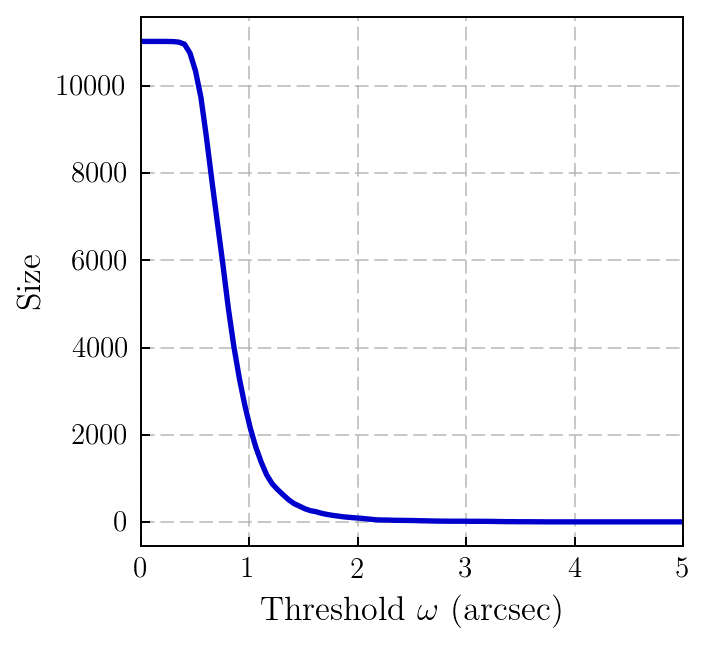

In [46]:
fig = plt.figure(figsize=(4.0,4.0))

plt.plot(omega, sample_size_rad, c='mediumblue', linewidth=2.2)
plt.grid(ls='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=12)
plt.ylabel('Size',fontsize=14)
plt.xlabel('Threshold $\omega$ (arcsec)',fontsize=14)


plt.xlim(0.0,5.0)
plt.show()

This is one of the most effective cuts obviously. Let's plot the same for a range $\omega \in [1.5, 5.0]$ to see more clearly what is going on in that region.

In [47]:
# Range in omega
omega = np.linspace(1.5, 5.0, 200) 
om_size = len(omega)
# =========================================================
# =========================================================
sample_size_rad = np.zeros(om_size)
# =========================================================

for i in range(om_size):
    # Define the cut
    radius_cut = ((FLUX_RADIUS_I_2 > omega[i])&(FLUX_RADIUS_I_2 < 20.0))
    
    # Perform the cut now
    RA_temp = RA_2[radius_cut]

    sample_size_rad[i] = len(RA_temp)

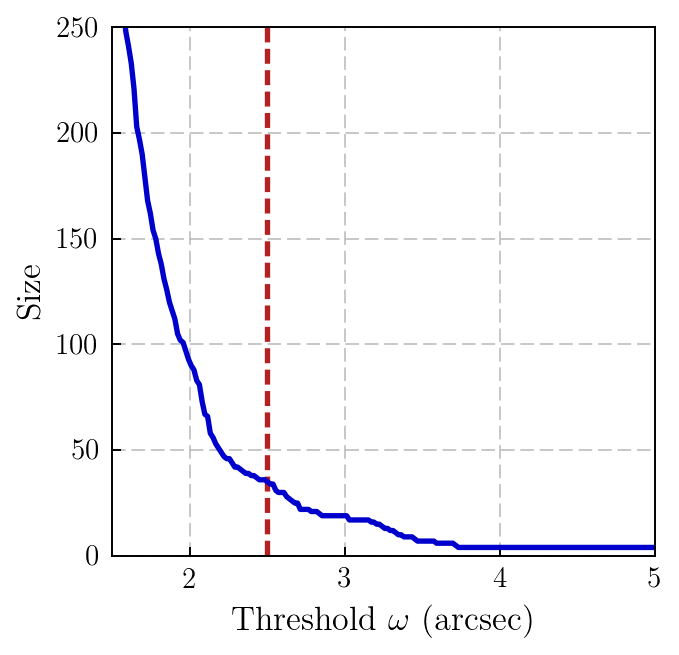

In [48]:
fig = plt.figure(figsize=(4.0,4.0))

plt.plot(omega, sample_size_rad, c='mediumblue', linewidth=2.2)
plt.grid(ls='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=12)
plt.ylabel('Size',fontsize=14)
plt.xlabel('Threshold $\omega$ (arcsec)',fontsize=14)

plt.vlines(2.5,-20.0,250.0, color='firebrick', linestyle='--', linewidth= 2.2)


plt.xlim(1.5,5.0);plt.ylim(0.0,250)
plt.show()

In [49]:
# Define the cut first
radius_cut = ((FLUX_RADIUS_I_2 > 2.5)&(FLUX_RADIUS_I_2 < 20.0))

# =============================================
# =============================================

# Perform the cut now
# =====================================================================
# =====================================================================

# RA and DEC
RA_3 = RA_2[radius_cut]
DEC_3 = DEC_2[radius_cut]

# Image A/ Image B
IMAGE_A_3 = IMAGE_A_2[radius_cut]
IMAGE_B_3 = IMAGE_B_2[radius_cut]

print(len(RA_3))

36


#### A cut on ellipticity

We want also to also exclude objects with very high ellipticity, since this can be a sign of blending with larger objects.

Ellipticity is defined:

\begin{equation}
\epsilon = 1 - \frac{b}{a}
\end{equation}

Perform a cut of the form $\epsilon < 0.6$.

In [50]:
ellipticity = 1.0 - IMAGE_B_3/IMAGE_A_3

print(ellipticity)

[ 0.03952867  0.33709627  0.23609787  0.28356075  0.72943848  0.19623268
  0.51281339  0.32834595  0.31333941  0.51428205  0.16349071  0.24087977
  0.46814877  0.16056514  0.26385385  0.0860914   0.28586394  0.13759851
  0.29381424  0.29694039  0.15213859  0.16479385  0.43887591  0.3196156
  0.0907892   0.32414389  0.25616837  0.08386636  0.55285329  0.36929452
  0.3622604   0.51127243  0.2200976   0.28884387  0.08204198  0.56243408]


In [51]:
ell_cut = (ellipticity < 0.6)

In [52]:
# RA and DEC
RA_4 = RA_3[ell_cut]
DEC_4 = DEC_3[ell_cut]

print(len(RA_4))

35


In [53]:
for i in range(len(RA_4)):
    print i+1, ',', RA_4[i],',',DEC_4[i]

1 , 10.158267 , -29.435139
2 , 10.239928 , -28.515861
3 , 10.04975 , -28.885002
4 , 10.051881 , -28.558336
5 , 9.901386 , -28.901212
6 , 10.074735 , -29.286819
7 , 9.629783 , -29.142527
8 , 9.500765 , -28.677722
9 , 9.62544 , -29.139468
10 , 10.467305 , -28.987208
11 , 9.989633 , -28.751601
12 , 9.631477 , -29.145967
13 , 9.520334 , -28.772812
14 , 10.111512 , -29.396729
15 , 10.461886 , -28.518853
16 , 9.861684 , -29.48425
17 , 9.861635 , -29.484456
18 , 9.720569 , -28.987824
19 , 10.072906 , -28.524251
20 , 10.239485 , -29.321997
21 , 9.984335 , -28.91711
22 , 9.978814 , -28.911673
23 , 9.985093 , -28.915985
24 , 9.922102 , -28.903947
25 , 9.646558 , -29.075983
26 , 9.89243 , -29.241187
27 , 10.012515 , -28.908278
28 , 10.011285 , -28.909055
29 , 9.866804 , -29.080227
30 , 9.879076 , -29.246414
31 , 9.735418 , -29.499761
32 , 10.241073 , -29.167395
33 , 10.330729 , -29.183767
34 , 9.633897 , -29.086413
35 , 9.627244 , -29.08985


From the 35 candidaces above, after visual inspection I find 5 that seem to be real low surface brightness objects (For one of them I am not so sure).

In [54]:
from IPython.display import Image

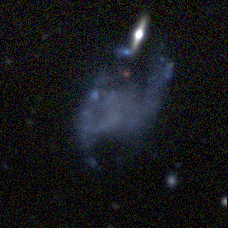

In [55]:
Image(filename='Reg_2_1.png')

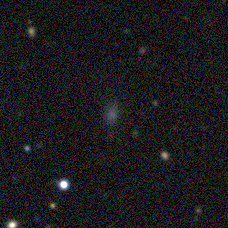

In [56]:
Image(filename='Reg_2_2.png')

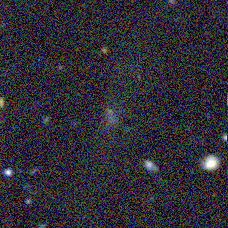

In [57]:
Image(filename='Reg_2_3.png')

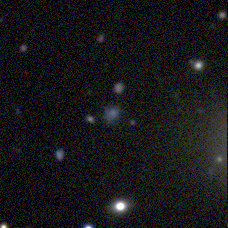

In [58]:
Image(filename='Reg_2_4.png')

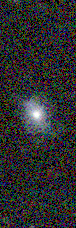

In [59]:
Image(filename='Reg_2_5.png', width=150)